In [1]:
from functions_ngates_v1 import calc_variance_ng, calc_variance_pure
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm import tqdm

Using device: cpu


In [50]:
N = 4
layers1 = np.arange(2, 30, 2)

In [ ]:
sigma_x = th.tensor([[0, 1], [1, 0]], dtype=th.complex128)
sigma_z = th.tensor([[1, 0], [0, -1]], dtype=th.complex128)
id = th.eye(2, dtype=th.complex128)

theta = np.pi/2

generator = th.kron(id, sigma_x) - th.kron(sigma_z, sigma_x)

jumpOPs = []
for i in range(N):
    Id1 = th.eye(2**i, dtype=th.complex128)
    Id2 = th.eye(2**(N - i - 1), dtype=th.complex128)
    jumpOPs.append(th.kron(Id1, th.kron(generator, Id2)))


In [51]:
result = [calc_variance_ng(N, l, noise=(jumpOPs,True), n_sim=100, n_sim_noise=100)[:,-1] for l in tqdm(layers1)]

AttributeError: 'list' object has no attribute 'shape'

In [16]:
# results2 = [calc_variance_ng(4, l, n_sim=1000, n_sim_noise=100,)[:,-1] for l in tqdm(layers1)]

In [33]:
var1 = []
var2 = []
var0 = []

for l in range(len(layers1)):
    resh1 = result[l]
    var1.append(th.std(resh1))
    # var2.append(th.std(th.mean(resh2, dim=1)).to('cpu').numpy())
    # var0.append(th.std(resh2[:,10]).to('cpu').numpy())

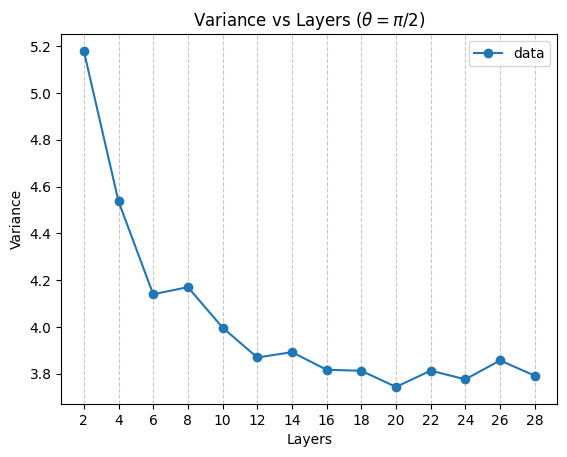

In [35]:
plt.plot(layers1, var1, marker='o', label='data')
# plt.plot(layers1, var2, label='CUDA')
# plt.plot(layers1, var0, label='First Layer (CUDA)', linestyle='--')
plt.xlabel('Layers')
plt.grid(axis='x', which='both', linestyle='--', alpha=0.7)
plt.xticks(layers1)
plt.ylabel('Variance')
plt.title(r'Variance vs Layers ($\theta=\pi/2$)')
plt.legend()
plt.show()